In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import seaborn as sns
import scipy.stats as scp

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [43]:
import warnings
warnings.filterwarnings("ignore")

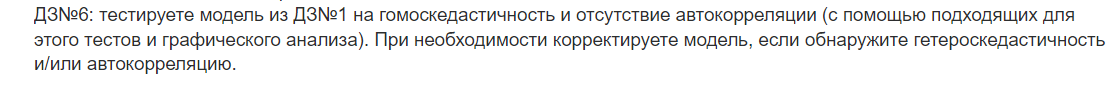

In [52]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Эконометрика/Домашнее задание 5-6.csv', sep = ';', decimal = ',')
x = data['X']
y = data['Y']
data

,year,X,Y
0,2000,9.2,4.762676
1,2001,8.5,1.042202
2,2002,8.3,8.643859
3,2003,8.5,23.079495
4,2004,8.9,14.970938
5,2005,8.9,3.694779
6,2006,8.8,5.645419
7,2007,8.0,14.599327
8,2008,7.5,9.736179
9,2009,9.1,-7.709719


In [27]:
data = data.drop('year', axis = 1)
data.head()

,X,Y
0,9.2,4.762676
1,8.5,1.042202
2,8.3,8.643859
3,8.5,23.079495
4,8.9,14.970938


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


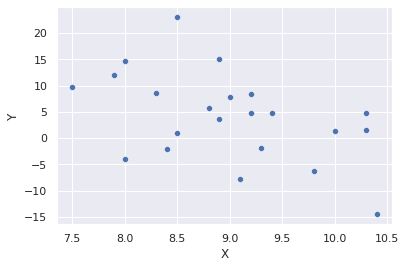

In [13]:
sns.set()
sns.scatterplot(x, y)

In [14]:
import statsmodels.api as sm
results = sm.OLS.from_formula("Y ~ X", data = data).fit()

Основная модель регрессии

In [15]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.229
Model:                            OLS   Adj. R-squared:                  0.191
Method:                 Least Squares   F-statistic:                     5.947
Date:                Sat, 10 Dec 2022   Prob (F-statistic):             0.0242
Time:                        01:29:17   Log-Likelihood:                -74.744
No. Observations:                  22   AIC:                             153.5
Df Residuals:                      20   BIC:                             155.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     48.2294     18.169      2.654      0.0

#Считаем остатки

In [16]:
reg = LinearRegression().fit(x.values.reshape(-1,1), y.values.reshape(-1,1))

In [17]:
epsilons = y.values.reshape(-1,1) - reg.predict(x.values.reshape(-1, 1))

In [18]:
mean_e = epsilons.mean()
std_e = epsilons.std()

vec_w = (-1) * (epsilons - mean_e) / std_e
vec_w[:5]

array([[-0.23691399],
       [ 0.75286089],
       [-0.16243865],
       [-2.29431523],
       [-1.44473385]])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


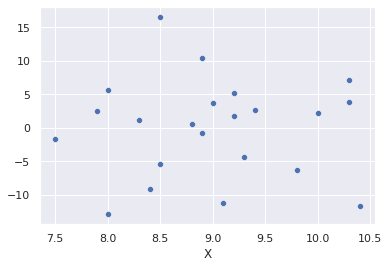

In [19]:
sns.set()
sns.scatterplot(x, epsilons.reshape(1, -1)[0])

Как следует из графика, нормального распределения остатков нет

In [20]:
# тест ранговой корреляции Спирмена

rho, p = scp.spearmanr(x, abs(epsilons))
rho, p

(0.11309030242269326, 0.6163076095411506)

In [47]:
# тест Глейзера
result = [0, 1, 2, 3, 4, 5]
data_1 = data
data_1.columns = ['y', 'x']
model = ['x', 'np.sqrt(x)', 'np.abs(1/x)', 'np.abs(1 / np.sqrt(x))', 'np.sqrt(x ** 3)']

result[1] = sm.OLS.from_formula("np.abs(epsilons) ~ x", data = data_1).fit().tvalues['x']
result[2] = sm.OLS.from_formula("np.abs(epsilons) ~ np.sqrt(x)", data = data_1).fit().tvalues['np.sqrt(x)']
result[3] = sm.OLS.from_formula("np.abs(epsilons) ~ np.abs(1/x)", data = data_1).fit().tvalues['np.abs(1 / x)']
result[4] = sm.OLS.from_formula("np.abs(epsilons) ~ np.abs(1 / np.sqrt(x))", data = data_1).fit().tvalues['np.abs(1 / np.sqrt(x))']
result[5] = sm.OLS.from_formula("np.abs(epsilons) ~ np.sqrt(x ** 3)", data = data_1).fit().tvalues['np.sqrt(x ** 3)']

for i in range(5):
  print(f'Model {model[i]} t-stats : {np.abs(result[i + 1])}')
print(scp.t.isf(0.05 / 2, 20))

Model x t-stats : 3.534415069889281
Model np.sqrt(x) t-stats : 7.2080643450497695
Model np.abs(1/x) t-stats : 2.61360426639657
Model np.abs(1 / np.sqrt(x)) t-stats : 3.4610263116630597
Model np.sqrt(x ** 3) t-stats : 9.193121635057915
2.085963447265837


Из этого критерия следует, что гипотеза H0 отвергается, и остатки гетероскедастичны

#Робустная ковариационная матрица

In [30]:
print(results.get_robustcov_results(cov_type = "HC0").summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.191   
Dependent Variable: Y                AIC:                153.4882
Date:               2022-12-10 01:34 BIC:                155.6703
No. Observations:   22               Log-Likelihood:     -74.744 
Df Model:           1                F-statistic:        6.642   
Df Residuals:       20               Prob (F-statistic): 0.0180  
R-squared:          0.229            Scale:              57.533  
------------------------------------------------------------------
               Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
------------------------------------------------------------------
Intercept     48.2294   17.3084   2.7865  0.0114  12.1247  84.3341
X             -4.9109    1.9056  -2.5771  0.0180  -8.8858  -0.9359
-----------------------------------------------------------------
Omnibus:              0.053        Durbin-Watson:           1.727
Prob(Omnibus):        

In [45]:
white_test = het_white(results.get_robustcov_results(cov_type = "HC0").resid, results.get_robustcov_results(cov_type = "HC0").model.exog)

#define labels to use for output of White's test
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']

#print results of White's test
print(dict(zip(labels, white_test))['Test Statistic p-value'])

0.9653326305899965


Из теста Уайта следует, что после робустной матрицы устранена гетероскедастичность, так как по результатам теста Уайта мы принимаем гипотезу H0.

# Метод Доступных Взвешенных Наименьших Квадратов

In [31]:
data_2 = data_1
data_2['x'] = 1 / data_2['x']
data_2['y'] = data_2['y'] * data_2['x']

fin_model = sm.OLS.from_formula("y ~ x", data = data_2)
result_dmnk = fin_model.fit()

In [32]:
sum_dm = result_dmnk.summary()
print(sum_dm)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     2537.
Date:                Sat, 10 Dec 2022   Prob (F-statistic):           1.51e-22
Time:                        01:34:58   Log-Likelihood:                -3.1805
No. Observations:                  22   AIC:                             10.36
Df Residuals:                      20   BIC:                             12.54
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0322      0.066      0.488      0.6

In [34]:
y_pred = fin_model.predict(fin_model.fit().model.exog.reshape(2, 22))
y_pred[:5]

array([[ 1.20996602e+00,  2.35230778e-01,  1.20996602e+00,
         9.25766293e-01,  1.20996602e+00,  1.60026431e-01,
         1.20996602e+00,  1.86584444e-01,  1.20996602e+00,
         5.23307414e-02,  1.20996602e+00,  4.25316566e-01,
         1.20996602e+00,  2.21220514e-01,  1.20996602e+00,
         9.55816094e-02,  1.20996602e+00,  4.43081096e-03,
         1.20996602e+00, -1.82733993e-01,  1.20996602e+00,
        -5.36142910e-01],
       [ 1.95950704e+00,  3.25421453e-01,  1.95950704e+00,
         8.05317870e-01,  1.95950704e+00,  3.18302840e-01,
         1.95950704e+00,  6.97982460e-01,  1.95950704e+00,
         6.92071945e-04,  1.95950704e+00,  9.77440715e-01,
         1.95950704e+00,  3.78598656e-01,  1.95950704e+00,
         1.92271281e-01,  1.95950704e+00, -3.46407210e-01,
         1.95950704e+00, -3.72032971e-01,  1.95950704e+00,
        -4.73454024e-01],
       [ 1.11568908e+00,  2.23886635e-01,  1.11568908e+00,
         9.40916243e-01,  1.11568908e+00,  1.40118494e-01,
    

#### 95% доверительный интервал :
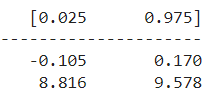

In [35]:
scp.f.ppf(q = 1 - 0.05, dfn = 1, dfd = len(data_2) - 2)

4.351243503329288

###Значимость параметров регресии:

b0 => p-value > 0.05, следовательно гипотеза H0 принимается и параметр не значим

b1 => p-value < 0.05, следовательно гипотеза H0 отвергается и параметр значим

###Значимость модели регрессии:
F-stat = 2537 > F-table = 4.351, следовательно гипотеза H0 отвергается и модель значима

###Качество модели
R^2 = 0.992

R^2(adj) = 0.992

Качество модели отличное - значение R^2 больше 0.8, кроме того различие между скорректированным коэффициентом и обычным достаточно близки между собой

Считаем остатки скорректированной модели

In [37]:
reg = LinearRegression().fit(data_2['x'].values.reshape(-1,1), data_2['y'].values.reshape(-1,1))
epsilons = data_2['y'].values.reshape(-1,1) - reg.predict(data_2['x'].values.reshape(-1, 1))

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


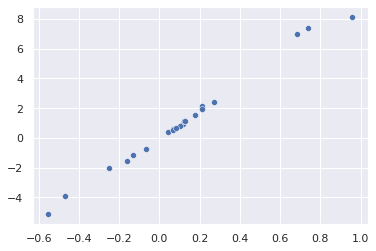

In [36]:
sns.set()
sns.scatterplot(data_2['x'].values, data_2['y'].values)

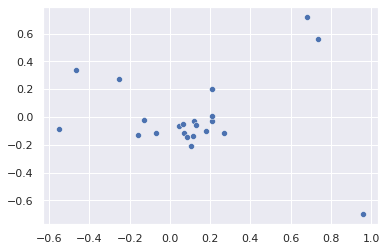

In [39]:
sns.set()
sns.scatterplot(data_2['x'].values, epsilons.reshape(1, -1)[0])

После преобразования нет нормального распределения

###Тест Уайта

In [40]:
from statsmodels.stats.diagnostic import het_white

#perform White's test
white_test = het_white(fin_model.fit().resid, fin_model.fit().model.exog)

#define labels to use for output of White's test
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']

#print results of White's test
print(dict(zip(labels, white_test))['Test Statistic p-value'])

9.111863761196062e-05


###Тест Голфреда-Кванта

In [48]:

from statsmodels.stats import api
new_x = np.concatenate((np.ones((len(data['y']), 1)), data_2['x'].values.reshape(-1, 1)), axis = 1)

api.het_goldfeldquandt(epsilons, new_x)

(4.559595336066555, 0.016916729201749102, 'increasing')

p-value = 10^(-5) < 0.05 следовательно гипотеза H0 отвергается и модель показывает гетероскедастичность после тестов Уайта и Голфреда Кванта

После применения методас робустной ковариационной матрицей качество и адекватность модели не меняется, при устранении гетероскедастичности. При этом метод ДМНК, сильно улучшил качество модели, но при этом не устранил гетероскедастичность.

#«Автокорреляция»

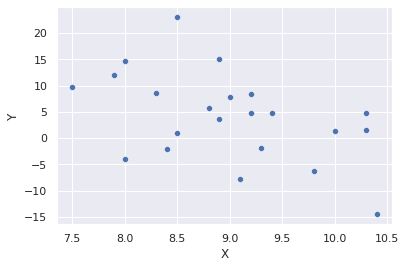

In [50]:
sns.set()
sns.scatterplot(x, y)

In [53]:
results = sm.OLS.from_formula("Y ~ X", data = data).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.229
Model:                            OLS   Adj. R-squared:                  0.191
Method:                 Least Squares   F-statistic:                     5.947
Date:                Sat, 10 Dec 2022   Prob (F-statistic):             0.0242
Time:                        01:57:43   Log-Likelihood:                -74.744
No. Observations:                  22   AIC:                             153.5
Df Residuals:                      20   BIC:                             155.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     48.2294     18.169      2.654      0.0

In [56]:
from statsmodels.stats.stattools import durbin_watson

#perform Durbin-Watson test
durbin_watson(results.resid)

1.7269779188844552

По результатам теста Дарбина-Уотстона гипотеза об отсутствии антикорреляции скорее всего принимается